In [50]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

token = 'Flicker8k_text/Flickr8k.token.txt'

captions = open(token, 'r').read().strip().split('\n')

imag_dict = {}
for row in captions:
    row = row.split('\t')
    row[0] = row[0][:len(row[0]) - 2]
    if row[0] in imag_dict:
        imag_dict[row[0]].append(row[1])
    else:
        imag_dict[row[0]] = [row[1]]
#print(imag_dict)

In [51]:
import glob

imag = 'Flicker8k_Dataset/Flicker8k_Dataset/'
images = glob.glob(imag+'*.jpg')
#print(images)

In [52]:
for i in range(len(images)):
    if images[i].find('') >= 0:
        images[i] = images[i][:len(imag)-1] + '/' + images[i][len(imag):]

train_images_file = 'Flicker8k_text/Flickr_8k.trainImages.txt'

train_images_set = set(open(train_images_file, 'r').read().strip().split('\n'))

def split_data(l):
    temp = []
    for i in images:
        if i[len(imag):] in l:
            temp.append(i)
    return temp

train_images = split_data(train_images_set)

val_images_file = 'Flicker8k_text/Flickr_8k.devImages.txt'
val_images_set = set(open(val_images_file, 'r').read().strip().split('\n'))
val_images = split_data(val_images_set)

from PIL import Image

# Image.open(train_images[0])

def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

from keras.preprocessing import image
import numpy as np

def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)
    return x

#import matplotlib.pyplot as plt

# plt.imshow(np.squeeze(preprocess(train_images[0])))

from keras.applications.inception_v3 import InceptionV3
model = InceptionV3(weights='imagenet')


from keras.models import Model

new_input = model.input
hidden_layer = model.layers[-2].output

model_new = Model(new_input, hidden_layer)

# tryi = model_new.predict(preprocess(train_images[0]))

def encode(image):
    image = preprocess(image)
    temp_enc = model_new.predict(image)
    temp_enc = np.reshape(temp_enc, temp_enc.shape[1])
    return temp_enc
print("good")

good


In [53]:
from tqdm import tqdm
import tensorflow as tf   
encoding_train = {}
# for oneimage in tqdm(train_images):
#     encoding_train[oneimage[len(imag):]] = encode(oneimage)

In [54]:
import pickle
# with open("encoded_images_inceptionV3.p", "wb") as encoded_pickle:
#     pickle.dump(encoding_train, encoded_pickle)

#test_images_file = 'Flicker8k_text/Flickr_8k.testImages.txt'
imagtest = 'Flicker8k_Dataset/PersonaltestImages/'

import glob
test_images = glob.glob(imagtest+'*.jpg')

for i in range(len(test_images)):
    if test_images[i].find('') >= 0:
        test_images[i] = test_images[i][:len(imagtest)-1] + '/' + test_images[i][len(imagtest):]
print(test_images)

['Flicker8k_Dataset/PersonaltestImages/2677656448_6b7e7702af.jpg']


In [55]:
test_images_file = 'Flicker8k_text/PersonaltestImages.txt'
test_images_set = set(open(test_images_file, 'r').read().strip().split('\n'))
print(test_images_set)

{'2677656448_6b7e7702af.jpg'}


In [56]:
def split_data_test(l):
    temp = []
    for i in test_images:
        if i[len(imagtest):] in l:
            temp.append(i)
    return temp
test_images = split_data_test(test_images_set)

print(test_images)

['Flicker8k_Dataset/PersonaltestImages/2677656448_6b7e7702af.jpg']


In [57]:
encoding_test = {}
from tqdm import tqdm
# for oneimage in tqdm(test_images):
#     encoding_test[oneimage[len(imag):]] = encode(oneimage)
    
for oneimage in tqdm(test_images):
    encoding_test[oneimage[len(imagtest):]] = encode(oneimage)  
    
with open("encoded_images_personaltest_inceptionV3.p", "wb") as encoded_pickle:
    pickle.dump(encoding_test, encoded_pickle)
print("good")

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


good


In [58]:
import pickle
encoding_train = pickle.load(open('encoded_images_inceptionV3.p', 'rb'))

encoding_test = pickle.load(open('encoded_images_personaltest_inceptionV3.p', 'rb'))

# train_dict = {}
# for i in train_images:
#     if i[len(imag):] in imag_dict:
#         train_dict[i] = imag_dict[i[len(imag):]]
# print(train_dict)

In [59]:
# train_dict_file = open('train_dict_file.pkl', 'wb')
# pickle.dump(train_dict, train_dict_file)
# train_dict_file.close()

In [60]:
train_dict_file = open('train_dict_file.pkl', 'rb')
train_dict = pickle.load(train_dict_file)
train_dict_file.close()

In [61]:
# val_dict = {}
# for i in val_images:
#     if i[len(imag):] in imag_dict:
#         val_dict[i] = imag_dict[i[len(imag):]]
        
# val_dict_file = open('val_dict_file.pkl', 'wb')
# pickle.dump(val_dict, val_dict_file)
# val_dict_file.close()

val_dict_file = open('val_dict_file.pkl', 'rb')
val_dict = pickle.load(val_dict_file)
val_dict_file.close()

In [62]:
# test_dict = {}
# for i in test_images:
#     if i[len(imag):] in imag_dict:
#         test_dict[i] = imag_dict[i[len(imag):]]
        
# test_dict_file = open('test_dict_file.pkl', 'wb')
# pickle.dump(test_dict, test_dict_file)
# test_dict_file.close()

# test_dict_file = open('test_dict_file.pkl', 'rb')
# test_dict = pickle.load(test_dict_file)
# test_dict_file.close()

In [63]:
caps = []
for key, val in train_dict.items():
    for i in val:
        caps.append('<start> ' + i + ' <end>')

In [64]:
words = [i.split() for i in caps]

In [65]:
# unique = []
# for i in words:
#     unique.extend(i)

# unique = list(set(unique))
# with open("unique.p", "wb") as pickle_d:
#     pickle.dump(unique, pickle_d)

    
unique = pickle.load(open('unique.p', 'rb'))

word2idx = {val:index for index, val in enumerate(unique)}
idx2word = {index:val for index, val in enumerate(unique)}

print(word2idx['<start>'])
print(idx2word[5553])

max_len = 0
for c in caps:
    c = c.split()
    if len(c) > max_len:
        max_len = len(c)

vocab_size = len(unique)
print(len(unique), max_len)

5553
<start>
8256 40


In [66]:
# f = open('flickr8k_training_dataset.txt', 'w')
# f.write("image_id\tcaptions\n")


# for key, val in train_dict.items():
#     for i in val:
#         f.write(key[len(imag):] + "\t" + "<start> " + i +" <end>" + "\n")

# f.close()
import pandas as pd
df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')
len(df)

30000

In [67]:
c = [i for i in df['captions']]
len(c)

30000

In [68]:
imgs = [i for i in df['image_id']]

In [69]:
a = c[0]
a, imgs[0]

('<start> A brown and black dog runs down a sandy beach . <end>',
 '1799271536_6e69c8f1dc.jpg')

In [70]:
for i in a.split():
    print (i, "=>", word2idx[i])

<start> => 5553
A => 4228
brown => 8177
and => 492
black => 2143
dog => 173
runs => 5544
down => 2383
a => 32
sandy => 4776
beach => 7057
. => 7023
<end> => 5232


In [71]:
samples_per_epoch = 0
for ca in caps:
    samples_per_epoch += len(ca.split())-1
    

samples_per_epoch

383454

In [72]:
from keras.preprocessing import sequence
def data_generator(batch_size = 32):
        partial_caps = []
        next_words = []
        images = []
        
        df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')
        df = df.sample(frac=1)
        iter = df.iterrows()
        c = []
        imgs = []
        for i in range(df.shape[0]):
            x = next(iter)
            c.append(x[1][1])
            imgs.append(x[1][0])


        count = 0
        while True:
            for j, text in enumerate(c):
                current_image = encoding_train[imgs[j]]
                for i in range(len(text.split())-1):
                    count+=1
                    
                    partial = [word2idx[txt] for txt in text.split()[:i+1]]
                    partial_caps.append(partial)
                    
                    # Initializing with zeros to create a one-hot encoding matrix
                    # This is what we have to predict
                    # Hence initializing it with vocab_size length
                    n = np.zeros(vocab_size)
                    # Setting the next word to 1 in the one-hot encoded matrix
                    n[word2idx[text.split()[i+1]]] = 1
                    next_words.append(n)
                    
                    images.append(current_image)

                    if count>=batch_size:
                        next_words = np.asarray(next_words)
                        images = np.asarray(images)
                        partial_caps = sequence.pad_sequences(partial_caps, maxlen=max_len, padding='post')
                        yield [[images, partial_caps], next_words]
                        partial_caps = []
                        next_words = []
                        images = []
                        count = 0

In [73]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Input, TimeDistributed, Dense, RepeatVector,merge, Merge, Activation, Flatten
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.preprocessing import image
from keras.preprocessing import sequence

embedding_size = 300

In [74]:

image_model = Sequential([
        Dense(embedding_size, input_shape=(2048,), activation='relu'),
        RepeatVector(max_len)
    ])

image_model.summary()
image_model.input_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               614700    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 40, 300)           0         
Total params: 614,700
Trainable params: 614,700
Non-trainable params: 0
_________________________________________________________________


(None, 2048)

In [75]:
caption_model = Sequential([
        Embedding(vocab_size, embedding_size, input_length=max_len),
        LSTM(256, return_sequences=True),
        TimeDistributed(Dense(300))
    ])

caption_model.summary()
caption_model.input_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           2476800   
_________________________________________________________________
lstm_3 (LSTM)                (None, 40, 256)           570368    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 300)           77100     
Total params: 3,124,268
Trainable params: 3,124,268
Non-trainable params: 0
_________________________________________________________________


(None, 40)

In [76]:
# model_output = concatenate([image_model.output,caption_model.output])


In [77]:
# Out = Bidirectional(LSTM(256, return_sequences=False), input_shape=(40,300))(model_output)
# Out = Dense(vocab_size)(Out)
# Out = Activation('softmax')(Out)

In [78]:
# with tf.device('/device:GPU:0'):
final_model = Sequential([
            Merge([image_model, caption_model], mode='concat', concat_axis=1),
            Bidirectional(LSTM(256, return_sequences=False)),
            Dense(vocab_size),
            Activation('softmax')
        ])
# final_model = Model([image_model.input, caption_model.input], Out)

C:\Users\hrd20\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
final_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
final_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_2 (Merge)              (None, 80, 300)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1140736   
_________________________________________________________________
dense_6 (Dense)              (None, 8256)              4235328   
_________________________________________________________________
activation_190 (Activation)  (None, 8256)              0         
Total params: 9,115,032
Trainable params: 9,115,032
Non-trainable params: 0
_________________________________________________________________


In [80]:
# with tf.device('/device:GPU:0'):
#     final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch, nb_epoch=1, 
#                               verbose=1)

In [81]:
#final_model.save_weights('time_inceptionV3_12_6_02.h5')

In [82]:
final_model.load_weights('time_inceptionV3_1.5987_loss.h5')

In [83]:
# def predict_captions(image):
#     start_word = ["<start>"]
#     while True:
#         par_caps = [word2idx[i] for i in start_word]
#         par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
#         e = encoding_test[image[len(imag):]]
#         preds = final_model.predict([np.array([e]), np.array(par_caps)])
#         word_pred = idx2word[np.argmax(preds[0])]
#         start_word.append(word_pred)
        
#         if word_pred == "<end>" or len(start_word) > max_len:
#             break
            
#     return ' '.join(start_word[1:-1])


def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word2idx[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        e = encoding_test[image[len(imagtest):]]
        preds = final_model.predict([np.array([e]), np.array(par_caps)])
        word_pred = idx2word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

In [84]:
# def beam_search_predictions(image, beam_index = 3):
#     start = [word2idx["<start>"]]
    
#     start_word = [[start, 0.0]]
    
#     while len(start_word[0][0]) < max_len:
#         temp = []
#         for s in start_word:
#             par_caps = sequence.pad_sequences([s[0]], maxlen=max_len, padding='post')
#             e = encoding_test[image[len(imag):]]
#             preds = final_model.predict([np.array([e]), np.array(par_caps)])
            
#             word_preds = np.argsort(preds[0])[-beam_index:]
            
#             # Getting the top <beam_index>(n) predictions and creating a 
#             # new list so as to put them via the model again
#             for w in word_preds:
#                 next_cap, prob = s[0][:], s[1]
#                 next_cap.append(w)
#                 prob += preds[0][w]
#                 temp.append([next_cap, prob])
                    
#         start_word = temp
#         # Sorting according to the probabilities
#         start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
#         # Getting the top words
#         start_word = start_word[-beam_index:]
    
#     start_word = start_word[-1][0]
#     intermediate_caption = [idx2word[i] for i in start_word]

#     final_caption = []
    
#     for i in intermediate_caption:
#         if i != '<end>':
#             final_caption.append(i)
#         else:
#             break
    
#     final_caption = ' '.join(final_caption[1:])
#     return final_caption

def beam_search_predictions(image, beam_index = 3):
    start = [word2idx["<start>"]]
    
    start_word = [[start, 0.0]]
    
    while len(start_word[0][0]) < max_len:
        temp = []
        for s in start_word:
            par_caps = sequence.pad_sequences([s[0]], maxlen=max_len, padding='post')
            e = encoding_test[image[len(imagtest):]]
            preds = final_model.predict([np.array([e]), np.array(par_caps)])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [idx2word[i] for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
        else:
            break
    
    final_caption = ' '.join(final_caption[1:])
    return final_caption

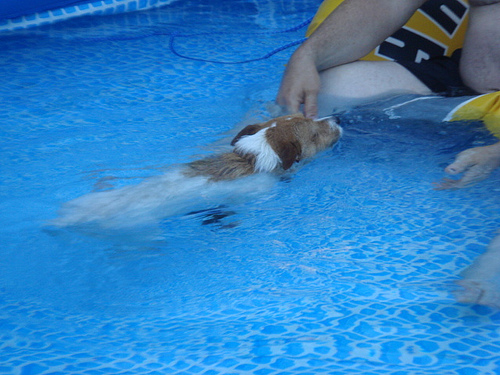

In [85]:
try_image = test_images[0]
Image.open(try_image)

In [86]:
print ('Normal Max search:', predict_captions(try_image)) 
print ('Beam Search, k=3:', beam_search_predictions(try_image, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image, beam_index=7))

Normal Max search: a a .
Beam Search, k=3: a a .
Beam Search, k=5: a a .
Beam Search, k=7: a a .
